In [13]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [14]:
# Prepare train-data
train_data = pd.read_csv(f'{working_dir}/../data/TrainData.csv')
X_train = train_data['WS10'].values.reshape(-1, 1)  # Wind speed at 10m above ground level
y_train = train_data['POWER'].values               # Normalized power values

In [16]:
k = 1000  # Number of neighbors
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1000)

In [17]:
weather_forecast = pd.read_csv(f'{working_dir}/../data/WeatherForecastInput.csv')
X_eval = weather_forecast['WS10'].values.reshape(-1, 1)
y_pred = knn.predict(X_eval)

In [18]:
forecast_template_knn = pd.read_csv(f'{working_dir}/../data/ForecastTemplate.csv')
forecast_template_knn['FORECAST'] = y_pred
forecast_template_knn.to_csv(f'{working_dir}/results/ForecastTemplate1-kNN.csv', index=False)

In [19]:
# Compare to solution and calculate RMSE
y_true = pd.read_csv(f'{working_dir}/../data/Solution.csv')['POWER'].values
rmse_knn = np.sqrt(mean_squared_error(y_true, y_pred))
print("RMSE for kNN model:", rmse_knn)

RMSE for kNN model: 0.21696126679520797


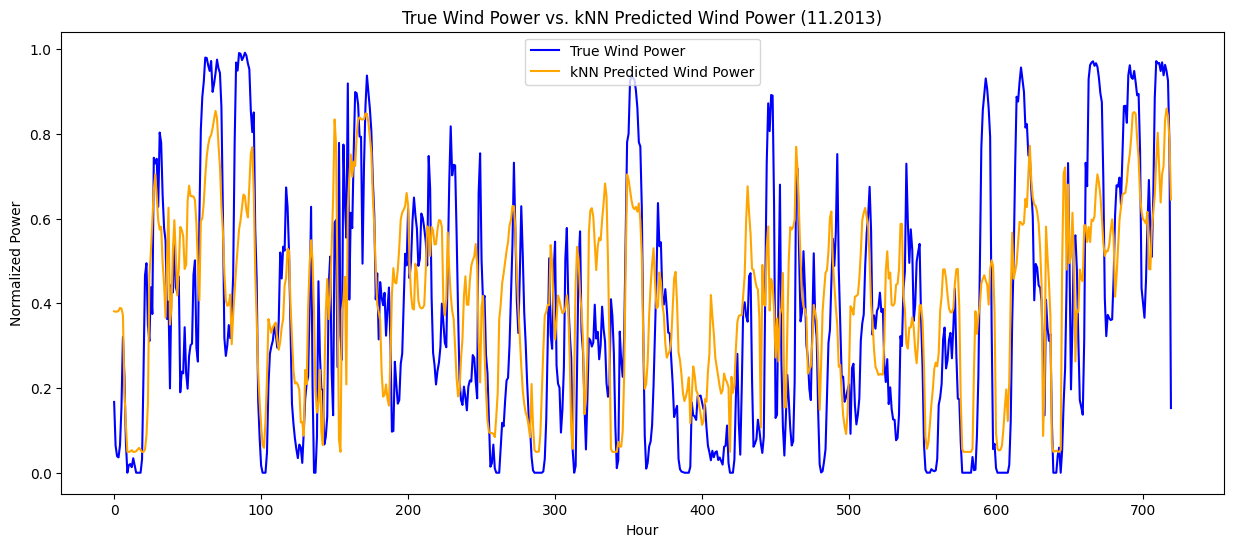

In [20]:
# Graph
plt.figure(figsize=(15, 6))
plt.plot(y_true, label='True Wind Power', color='blue')
plt.plot(y_eval_knn, label='kNN Predicted Wind Power', color='orange')
plt.legend()
plt.title('True Wind Power vs. kNN Predicted Wind Power (11.2013)')
plt.xlabel('Hour')
plt.ylabel('Normalized Power')
plt.show()

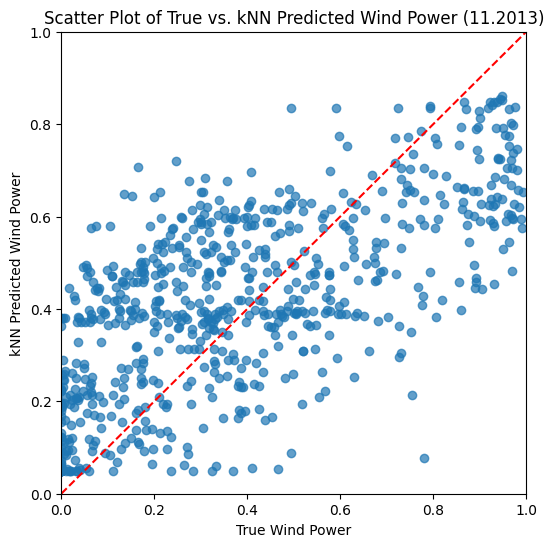

In [21]:
plt.figure(figsize=(6, 6))
plt.scatter(y_true, y_eval_knn, alpha=0.7)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('True Wind Power')
plt.ylabel('kNN Predicted Wind Power')
plt.title('Scatter Plot of True vs. kNN Predicted Wind Power (11.2013)')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

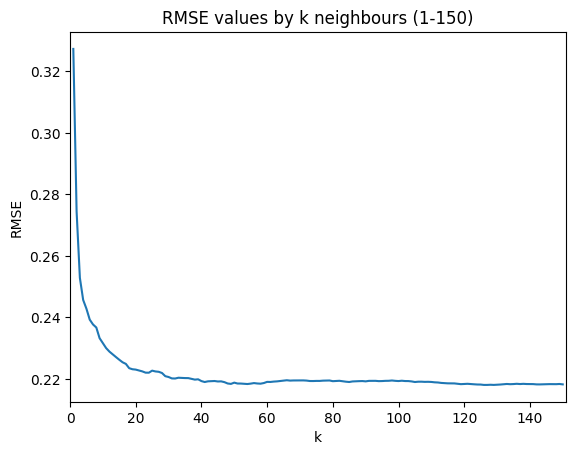

In [23]:
rmse = []
for k in range(1, 151):
# k = 1000  # Number of neighbors
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_eval_knn = knn.predict(X_eval)

    rmse_knn = np.sqrt(mean_squared_error(y_true, y_eval_knn))
    rmse.append(rmse_knn)

plt.plot(range(1, len(rmse) + 1), rmse)

# set the axis labels and title
plt.xlabel('k')
plt.xlim(0, len(rmse) + 1)
plt.ylabel('RMSE')
plt.title('RMSE values by k neighbours (1-150)')

# show the plot
plt.show()